# What is good food?

## Executive Summary
The project focuses on analyzing data from USDA's FoodData Central. This is an entry for a past competition organized by DataCamp which was not judged. The challenge was to answer the following questions:

#### Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
I look at the content of vitamin C (mg) in different categories and conclude that 'Beverages' is the category with the highest average content of vitamin C. There are a few items in the category that have especially high content since they are fortified products. The 'Fruits and Fruit Juices' category is #3 in terms of content of vitamin C with the top item called 'Acerola, (west indian cherry), raw' which contains 1677.9 mg of vitamin C.

#### Describe the relationship between the calories and water content of a food item.
In order to find whether there is a relationship between calories and water content of a food item, I use a scatterplot and calculate the Pearson correlation coefficient with the associated p-value. Both show that there is strong negative correlation between Calories (kcal) and Water (g). This means that the higher content of water is correlated with less calories.

#### What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
Using heatmaps, I demonstrate that categories of food items that are typically included in a high-protein diet such as 'Poultry Products' and 'Beef Products' contain less fiber and Vitamin C. In contrast, categories like 'Fruits and Fruit Juices' and 'Vegetables and Vegetable Products' are rich in these nutrients but high in carbohydrates which means that they are typically excluded from a zero-carb diet. Therefore, it appears that a balanced diet is more beneficial than following a strict zero-carb or high-protein diet.

#### A gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.
I create a linear model to test whether these estimates agree with the data. I conclude that while this is largely true for the dataset, there are some differences. Almost all items in the Top 10 items that contain more calories than predicted are alcoholic beverages. In addition, the Top 10 items with fewer calories than predicted include items containing sweeteners, cocoa, and various other ingredients. Further investigation is needed in order to uncover what is the reason for these difference in predicted versus actual amount of calories for these items.

## Data

I use data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html) which was made available in a CSV file with the below description from DataCamp [website](https://app.datacamp.com/). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

## Exploratory Data Analysis

In [2]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load data
df_food = pd.read_csv('nutrition.csv')
df_food.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg


In [3]:
# Identify the type of data available and count of non-null values
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FDC_ID        7793 non-null   int64 
 1   Item          7793 non-null   object
 2   Category      7793 non-null   object
 3   Calories      7793 non-null   object
 4   Protein       7793 non-null   object
 5   Carbohydrate  7793 non-null   object
 6   Total fat     7793 non-null   object
 7   Cholesterol   7394 non-null   object
 8   Fiber         7231 non-null   object
 9   Water         7793 non-null   object
 10  Alcohol       5399 non-null   object
 11  Vitamin C     7332 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.7+ KB


In [4]:
# Transform data type of columns from 'object' to 'float' where relevant
df_food['Calories'] = df_food['Calories'].str.strip(' kcal').astype(float)
df_food['Protein'] = df_food['Protein'].str.strip(' g').astype(float)
df_food['Carbohydrate'] = df_food['Carbohydrate'].str.strip(' g').astype(float)
df_food['Total fat'] = df_food['Total fat'].str.strip(' g').astype(float)
df_food['Cholesterol'] = df_food['Cholesterol'].str.strip(' mg').astype(float)
df_food['Fiber'] = df_food['Fiber'].str.strip(' g').astype(float)
df_food['Water'] = df_food['Water'].str.strip(' g').astype(float)
df_food['Alcohol'] = df_food['Alcohol'].str.strip(' g').astype(float)
df_food['Vitamin C'] = df_food['Vitamin C'].str.strip(' mg').astype(float)

df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FDC_ID        7793 non-null   int64  
 1   Item          7793 non-null   object 
 2   Category      7793 non-null   object 
 3   Calories      7793 non-null   float64
 4   Protein       7793 non-null   float64
 5   Carbohydrate  7793 non-null   float64
 6   Total fat     7793 non-null   float64
 7   Cholesterol   7394 non-null   float64
 8   Fiber         7231 non-null   float64
 9   Water         7793 non-null   float64
 10  Alcohol       5399 non-null   float64
 11  Vitamin C     7332 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 730.7+ KB


In [5]:
# Calculate the number of missing values (NaN) in the columns of the dataframe
df_food.isna().sum()

FDC_ID             0
Item               0
Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol      399
Fiber            562
Water              0
Alcohol         2394
Vitamin C        461
dtype: int64

## Vitamin C Content in Food

### What are the best sources of vitamin C?

In [6]:
# Find the average content of Vitamin C in different categories
df_food.groupby('Category')['Vitamin C'].mean().sort_values(ascending=False)

Category
Beverages                              33.689815
Spices and Herbs                       31.320635
Fruits and Fruit Juices                30.865043
Baby Foods                             27.623754
Vegetables and Vegetable Products      23.099506
Snacks                                 19.545143
American Indian/Alaska Native Foods    12.646392
Breakfast Cereals                       7.584021
Nut and Seed Products                   5.615556
Sweets                                  5.200000
Sausages and Luncheon Meats             3.471341
Restaurant Foods                        2.940385
Soups, Sauces, and Gravies              2.748971
Meals, Entrees, and Side Dishes         2.355224
Legumes and Legume Products             2.150186
Dairy and Egg Products                  1.769930
Lamb, Veal, and Game Products           1.642222
Fast Foods                              1.400000
Finfish and Shellfish Products          1.337984
Poultry Products                        1.025587
Pork Produc

In [7]:
# Find the Top 10 items with the highest content of Vitamin C across all categories
df_food.groupby('Item')['Vitamin C'].mean().sort_values(ascending=False).head(10)

Item
Babyfood, GERBER, 2nd Foods, apple, carrot and squash, organic                                         2732.0
Beverages, fruit-flavored drink, powder, with high vitamin C with other added vitamins, low calorie    2400.0
Beverages, Orange-flavor drink, breakfast type, low calorie, powder                                    2400.0
Peppers, sweet, red, freeze-dried                                                                      1900.0
Acerola, (west indian cherry), raw                                                                     1677.6
Acerola juice, raw                                                                                     1600.0
Beverages, tea, green, instant, decaffeinated, lemon, unsweetened, fortified with vitamin C            1342.3
Chives, freeze-dried                                                                                    660.0
Spices, coriander leaf, dried                                                                           566.7
Bever

In [8]:
# Identify the top items in the 'Beverages' category with the highest content of Vitamin C in mg
# Create a dataframe for 'Beverages'
df_beverages = df_food[df_food['Category'] == 'Beverages']

# Print the top 10 items in the 'Beverages' category with the highest content of Vitamin C in mg
df_beverages.groupby('Item')['Vitamin C'].mean().sort_values(ascending=False).head(10)

Item
Beverages, fruit-flavored drink, powder, with high vitamin C with other added vitamins, low calorie    2400.0
Beverages, Orange-flavor drink, breakfast type, low calorie, powder                                    2400.0
Beverages, tea, green, instant, decaffeinated, lemon, unsweetened, fortified with vitamin C            1342.3
Beverages, fruit-flavored drink, dry powdered mix, low calorie, with aspartame                          560.0
Beverages, Orange-flavor drink, breakfast type, with pulp, frozen concentrate.                          243.1
Beverages, orange-flavor drink, breakfast type, powder                                                  230.8
Beverages, Orange drink, breakfast type, with juice and pulp, frozen concentrate                        189.7
Beverages, Fruit punch drink, frozen concentrate                                                        155.6
Beverages, UNILEVER, SLIMFAST Shake Mix, high protein, whey powder, 3-2-1 Plan,                         103.8
Bever

### Which fruit has the highest vitamin C content?

In [9]:
# Create a new dataframe only for 'Fruits and Fruit Juices'
df_fruit = df_food[df_food['Category'] == 'Fruits and Fruit Juices']

# Find the item with the highest content of Vitamin C in 'Fruits and Fruit Juices'
item_Vitamin_C_name = df_fruit.groupby('Item')['Vitamin C'].mean().sort_values(ascending=False).index[0]

# Find the value of the content of Vitamin C in mg for the item
item_Vitamin_C_value = df_fruit.groupby('Item')['Vitamin C'].mean().sort_values(ascending=False).values[0]

# Print the result
print('The item in the "Fruits and Fruit Juices" category with the highest content of Vitmain C is', item_Vitamin_C_name, ' which contains ' + str(item_Vitamin_C_value), 'mg of Vitamin C.')

The item in the "Fruits and Fruit Juices" category with the highest content of Vitmain C is Acerola, (west indian cherry), raw  which contains 1677.6 mg of Vitamin C.


In [10]:
# Print the top 5 items in the category 'Fruit and Fruit Juices' with the highest content of Vitamin C in mg
df_fruit.groupby('Item')['Vitamin C'].mean().sort_values(ascending=False).head(5)

Item
Acerola, (west indian cherry), raw    1677.6
Acerola juice, raw                    1600.0
Guavas, common, raw                    228.3
Jujube, Chinese, fresh, dried          217.6
Litchis, dried                         183.0
Name: Vitamin C, dtype: float64

### Calories and Water Content in Food

Text(0, 0.5, 'Water (g)')

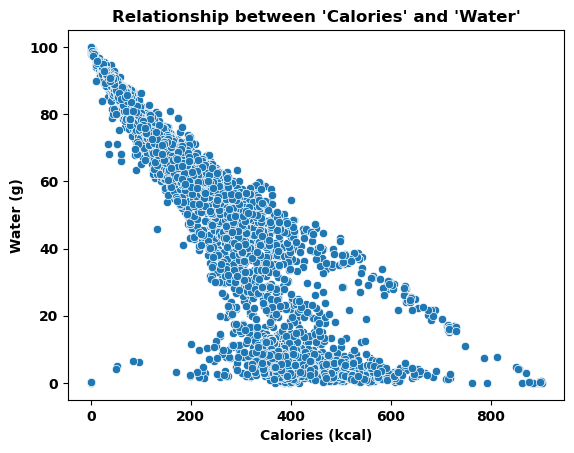

In [11]:
# Visualize the relationship between 'Calories' and 'Water' using a scatterplot
sns.scatterplot(x = df_food['Calories'], y = df_food['Water'])
plt.title("Relationship between 'Calories' and 'Water'")
plt.xlabel('Calories (kcal)')
plt.ylabel('Water (g)')

In [12]:
'''The graph shows that there seems to be strong negative correlation between the two variables. 
I will quantify this possible relationship using Pearson correlation.'''

from scipy import stats

correlation_coefficient, p_value = stats.pearsonr(df_food['Calories'], df_food['Water'])

print('Pearson correlation coefficient:', round(correlation_coefficient, 3))
print('Two-tailed p-value:', p_value )


Pearson correlation coefficient: -0.895
Two-tailed p-value: 0.0


Both the scatterplot and the Pearson correlation coefficient with the associated p-value show that there is strong negative correlation between Calories (kcal) and Water(g). This means that the higher content of water is correlated with less calories.

### What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?


In [13]:
df_food.groupby('Category')[['Calories','Protein','Carbohydrate', 'Total fat', 'Cholesterol', 'Fiber', 'Vitamin C']].mean()
df_food[['Calories','Protein','Carbohydrate', 'Total fat', 'Cholesterol', 'Fiber', 'Vitamin C']].mean(axis = 0)

Calories        220.243118
Protein          11.926873
Carbohydrate     19.569788
Total fat        10.687361
Cholesterol      45.045307
Fiber             1.979118
Vitamin C         8.975559
dtype: float64

In [14]:
df_food.groupby(['Item', 'Calories','Carbohydrate', 'Total fat', 'Cholesterol', 'Fiber', 'Vitamin C'])['Protein'].mean().sort_values(ascending=False).head(20)

Item                                                             Calories  Carbohydrate  Total fat  Cholesterol  Fiber  Vitamin C
Soy protein isolate                                              335.0     0.00          3.39       0.0          0.0    0.0          88.32
Soy protein isolate, potassium type                              321.0     2.59          0.53       0.0          0.0    0.0          88.32
Gelatins, dry powder, unsweetened                                335.0     0.00          0.10       0.0          0.0    0.0          85.60
Egg, white, dried, stabilized, glucose reduced                   357.0     4.51          0.32       0.0          0.0    0.0          84.08
Egg, white, dried, powder, stabilized, glucose reduced           376.0     4.47          0.04       0.0          0.0    0.0          82.40
Egg, white, dried                                                382.0     7.80          0.00       0.0          0.0    0.0          81.10
Beverages, Protein powder whey based

In [15]:
# Create a dataframe that illustrates the average nutritional content by food category, sorted by content of carbohydrates
nutrient_columns = ['Carbohydrate','Protein','Total fat', 'Fiber', 'Vitamin C']
relevant_columns = ['Carbohydrate', 'Category', 'Protein', 'Total fat', 'Fiber', 'Vitamin C']
df_food_nutrients = df_food[relevant_columns].groupby('Category')[nutrient_columns].mean().sort_values(by = 'Carbohydrate', ascending=False)
df_food_nutrients

,Carbohydrate,Protein,Total fat,Fiber,Vitamin C
Category,,,,,
Breakfast Cereals,67.790051,8.200000,4.040359,6.295897,7.584021
Snacks,64.492216,9.751477,17.061023,5.201852,19.545143
Cereal Grains and Pasta,58.473646,8.810387,2.253481,5.769565,0.054167
Sweets,56.176676,4.243994,10.798324,2.294648,5.200000
Baked Products,56.065803,6.925068,12.342766,3.371306,0.346517
Spices and Herbs,43.977619,10.075079,8.363175,19.306452,31.320635
"Meals, Entrees, and Side Dishes",29.423210,7.963580,6.830617,1.655556,2.355224
Nut and Seed Products,28.782555,15.256788,38.980219,8.527451,5.615556
Fast Foods,23.103429,12.381859,12.390801,1.626132,1.400000


Text(0.5, 1.0, 'Average nutritional content by category, sorted by carbohydrates (g)')

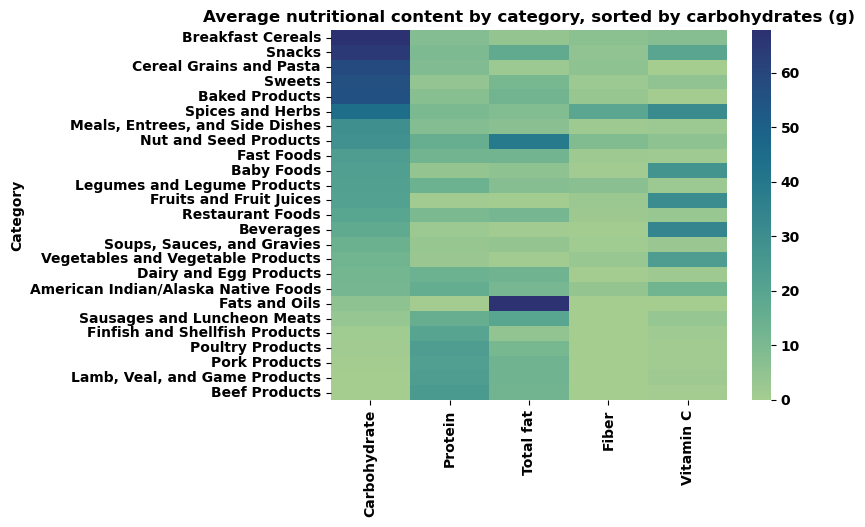

In [19]:
# Create a heatmap that illustrates the average nutritional content by food category, sorted by content of carbohydrates
sns.heatmap(df_food_nutrients, cmap = 'crest')
plt.title('Average nutritional content by category, sorted by carbohydrates (g)')

Text(0.5, 1.0, 'Average nutritional content by category, sorted by Protein (g)')

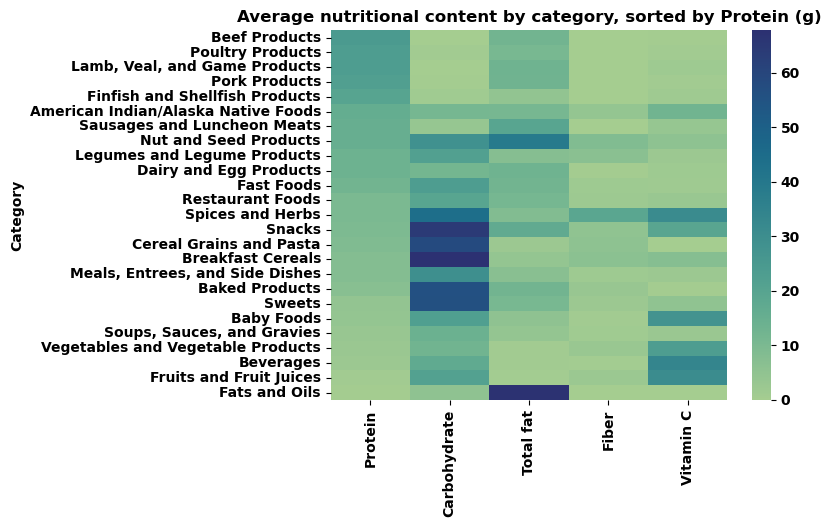

In [20]:
# Create a heatmap that illustrates the average nutritional content by food category, sorted by content of protein
nutrient_columns = ['Protein','Carbohydrate','Total fat', 'Fiber', 'Vitamin C']
relevant_columns = ['Protein', 'Carbohydrate', 'Category', 'Total fat', 'Fiber', 'Vitamin C']
df_food_nutrients = df_food[relevant_columns].groupby('Category')[nutrient_columns].mean().sort_values(by = 'Protein', ascending=False)
df_food_nutrients
sns.heatmap(df_food_nutrients, cmap = 'crest')
plt.title('Average nutritional content by category, sorted by Protein (g)')

It appears that categories of food that are high in carbohydrates are not as high in protein. Categories such as 'Beef Products', 'Lamb, Veal, and Game Products', 'Pork Product', 'Poultry Products' and 'Finfish and Shellfish Products' are high in protein but low in carbohydrates, fiber and vitamin C. All these findings suggests that a more balanced diet maybe more beneficial than following a strict high-protein or zero-carb diet.

# Sources of calories in food

According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. I will fit a linear model to test whether these estimates agree with the data. Afterwards, I will analyze the errors of the linear model to see what could be the hidden sources of calories in food.

In [35]:
# Create and fit the linear model
X = df_food[['Carbohydrate', 'Protein', 'Total fat']]
y_actual = df_food['Calories']
linear_model = LinearRegression()
linear_model.fit(X, y_actual)

# Find the coefficients in the linear model
coefficients = linear_model.coef_
print(coefficients)
print('The coefficients are ', round(coefficients[0], 2), 'for Carbohydrate', round(coefficients[1], 2), 'for Protein and ', round(coefficients[2], 2), 'for Total fat.' )

[3.79862627 4.00204437 8.80413501]
The coefficients are  3.8 for Carbohydrate 4.0 for Protein and  8.8 for Total fat.


In [38]:
# Find the predicted values for calories based on the estimate that a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each
df_food['Predicted Calories'] = df_food['Protein']*4 + df_food['Carbohydrate']*4 + df_food['Total fat']*9
y_predicted = df_food['Predicted Calories']

# Fit the predicted model and find the coefficients
linear_model_predicted = LinearRegression()
linear_model_predicted.fit(X, y_predicted)
coefficients_predicted = linear_model_predicted.coef_

# Calculate the residuals
df_food['Residuals'] = y_actual - y_predicted

# Show the Top 10 items with more calories than predicted
df_food.groupby('Item')['Residuals'].mean().sort_values(ascending=False).head(10)

Item
Alcoholic beverage, distilled, all (gin, rum, vodka, whiskey) 100 proof    295.00
Alcoholic beverage, distilled, all (gin, rum, vodka, whiskey) 94 proof     275.00
Alcoholic beverage, distilled, all (gin, rum, vodka, whiskey) 90 proof     263.00
Alcoholic beverage, distilled, all (gin, rum, vodka, whiskey) 86 proof     249.60
Alcoholic beverage, distilled, whiskey, 86 proof                           249.60
Vanilla extract                                                            236.62
Alcoholic beverage, distilled, all (gin, rum, vodka, whiskey) 80 proof     231.00
Alcoholic beverage, distilled, rum, 80 proof                               231.00
Alcoholic beverage, distilled, vodka, 80 proof                             231.00
Vanilla extract, imitation, alcohol                                        227.16
Name: Residuals, dtype: float64

In [37]:
# Show the Top 10 items with less calories than predicted
df_food.groupby('Item')['Residuals'].mean().sort_values().head(10)

Item
Sweetener, herbal extract powder from Stevia leaf                  -400.00
Cocoa, dry powder, unsweetened                                     -205.30
Cocoa, dry powder, unsweetened, processed with alkali              -203.50
Gelatin desserts, dry mix, reduced calorie, with aspartame         -185.52
Corn bran, crude                                                   -160.28
Carob flour                                                        -157.85
Cereals ready-to-eat, SUN COUNTRY, KRETSCHMER Toasted Wheat Bran   -154.72
Oat bran, raw                                                      -151.35
Baking chocolate, unsweetened, liquid                              -150.50
Wheat bran, crude                                                  -142.49
Name: Residuals, dtype: float64

I use linear regression to analyze the amount of predicted versus actual calories in food items. I use the information from the Cleveland Clinic website that a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. After I fit two linear models (actual vs predicted data) and look at the residuals, I conclude that this a reasonable way to calculate the amount of calories in different food items. However, there are certain notable exceptions. Eight out of the Top 10 items that contain more calories than predicted are alcoholic beverages and the remaining two are types of vanilla extract. In contrast, the Top 10 items that contain less calories than predicted are very diverse. Some of them contain sweeteners, cocoa or other ingredients. Further investigation, possibly including additional features, is needed in order to understand the difference in predicted versus actual amount of calories in different food items.